(a)

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

dataset = fetch_california_housing()
d = dataset.data.shape[1]

X = dataset.data
y = dataset.target
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=617)

(b)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


default_model = RandomForestRegressor(n_estimators=100, random_state=617)
default_model.fit(X_tr, y_tr)
y_training_pred = default_model.predict(X_tr)
training_MSE = mean_squared_error(y_tr, y_training_pred)
print("Training set MSE: ", training_MSE)

y_test_pred = default_model.predict(X_ts)
test_MSE = mean_squared_error(y_ts, y_test_pred)
print("Test set MSE: ", test_MSE)

Training set MSE:  0.03624832665289494
Test set MSE:  0.26057081648445357


(c)

In [21]:
import numpy as np
from scipy.stats import pearsonr

estimators = default_model.estimators_
pearson_correlation = []
for i in range(len(estimators)):
    for j in range(i + 1, len(estimators)):
        pred_1 = estimators[i].predict(X_ts)
        pred_2 = estimators[j].predict(X_ts)

        pccs = pearsonr(pred_1, pred_2)[0]
        pearson_correlation.append(pccs)

print("Average pairwise pearson correlations: ", np.mean(pearson_correlation))

Average pairwise correlations(Pearson correlation):  0.7645690716613076


(d)

  m    Training set MSE    Test set MSE    Average correlation
---  ------------------  --------------  ---------------------
  1           0.0398142        0.281533               0.767024
  2           0.0348184        0.246248               0.767023
  3           0.0345965        0.248642               0.767022
  4           0.0344288        0.247401               0.767022
  5           0.0356193        0.253843               0.767022
  6           0.0357838        0.259419               0.767023
  7           0.035924         0.258629               0.767025
  8           0.0362483        0.260571               0.767026


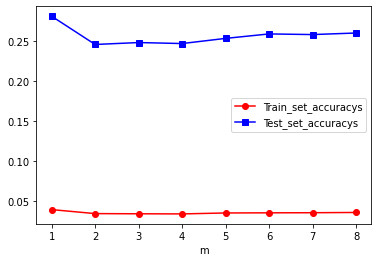

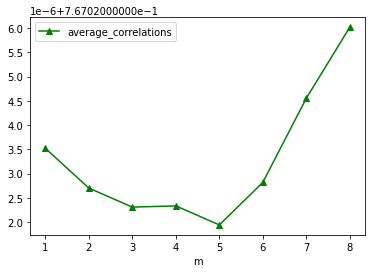

In [33]:
from tabulate import tabulate
import matplotlib.pyplot as plt

training_MSEs = []
test_MSEs = []
average_correlations = []
table_value = []
col_names = ["m", "Training set MSE", "Test set MSE", "Average correlation"]

for i in range(1, X.shape[1] + 1):
    RF_model = RandomForestRegressor(n_estimators=100, random_state=617, max_features=i)
    RF_model.fit(X_tr, y_tr)
    y_training_pred = RF_model.predict(X_tr)
    training_MSE = mean_squared_error(y_tr, y_training_pred)
    training_MSEs.append(training_MSE)

    y_test_pred = RF_model.predict(X_ts)
    test_MSE = mean_squared_error(y_ts, y_test_pred)
    test_MSEs.append(test_MSE)

    for j in range(len(estimators)):
        for k in range(i + 1, len(estimators)):
            pred_1 = estimators[j].predict(X_ts)
            pred_2 = estimators[k].predict(X_ts)

            pccs = pearsonr(pred_1, pred_2)[0]
            pearson_correlation.append(pccs)

    average_correlation = np.mean(pearson_correlation)
    average_correlations.append(average_correlation)
    table_value.append([i, training_MSE, test_MSE, average_correlation])

print(tabulate(table_value, headers=col_names))

plt.plot(range(1, X.shape[1] + 1), training_MSEs, 'ro-', label="Trainint set MSEs")
plt.plot(range(1, X.shape[1] + 1), test_MSEs, 'bs-', label="Test set MSEs")
plt.legend(loc='best')
plt.xlabel('m')
plt.show()

plt.plot(range(1, X.shape[1] + 1), average_correlations, 'g^-', label="average_correlations")
plt.legend(loc='best')
plt.xlabel('m')
plt.show()